In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("winequality-red.csv")

In [2]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [4]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [6]:
df.duplicated().sum()

240

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

0

## Scaling not required in Decision Tree

Because it doesn't affect

In [9]:
"""from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit()
scaler.transform()"""

'from sklearn.preprocessing import StandardScaler\n\nscaler = StandardScaler()\nscaler.fit()\nscaler.transform()'

In [10]:
from sklearn.model_selection import train_test_split

X = df.drop('quality', axis=1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

In [11]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(X_train, y_train)

DecisionTreeClassifier()

In [12]:
model.score(X_train, y_train)

1.0

> Model is overfitted

[Text(0.49521226025132276, 0.9761904761904762, 'X[10] <= 10.15\ngini = 0.652\nsamples = 910\nvalue = [5, 38, 385, 354, 115, 13]'),
 Text(0.3010395998677249, 0.9285714285714286, 'X[6] <= 91.5\ngini = 0.53\nsamples = 462\nvalue = [4, 24, 288, 129, 15, 2]'),
 Text(0.15551835317460316, 0.8809523809523809, 'X[1] <= 0.417\ngini = 0.575\nsamples = 377\nvalue = [4, 23, 212, 121, 15, 2]'),
 Text(0.06772486772486773, 0.8333333333333334, 'X[9] <= 0.655\ngini = 0.622\nsamples = 84\nvalue = [0, 2, 30, 41, 9, 2]'),
 Text(0.031746031746031744, 0.7857142857142857, 'X[4] <= 0.079\ngini = 0.52\nsamples = 47\nvalue = [0, 1, 24, 22, 0, 0]'),
 Text(0.016931216931216932, 0.7380952380952381, 'X[5] <= 31.5\ngini = 0.475\nsamples = 18\nvalue = [0, 1, 5, 12, 0, 0]'),
 Text(0.012698412698412698, 0.6904761904761905, 'X[0] <= 6.25\ngini = 0.398\nsamples = 16\nvalue = [0, 1, 3, 12, 0, 0]'),
 Text(0.008465608465608466, 0.6428571428571429, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0]'),
 Text(0.01693121693121

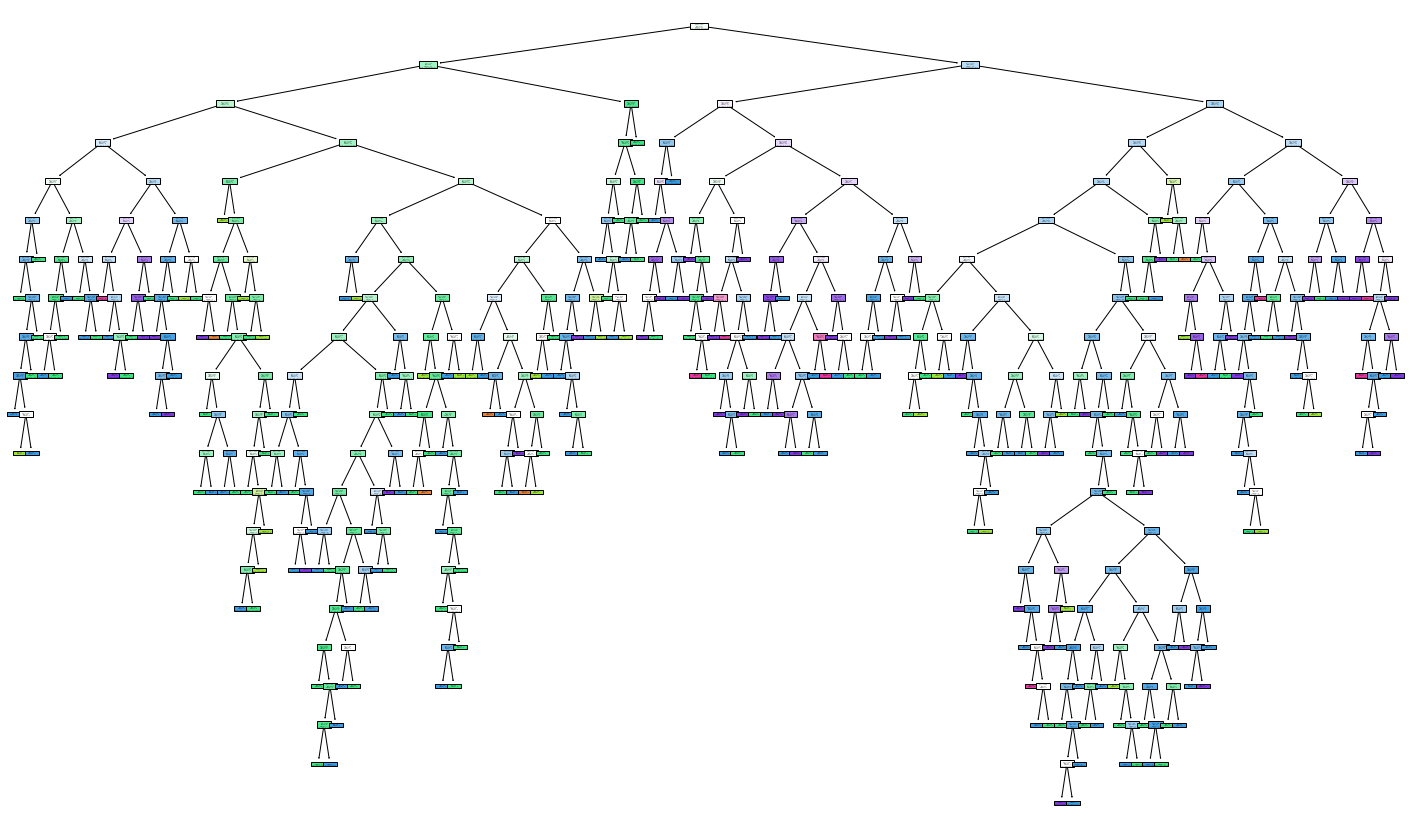

In [13]:
from sklearn import tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,15))
tree.plot_tree(model,filled=True)

In [14]:
y_pred = model.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.47438752783964366

> Dummy model!

It's an overfit model because training accuracy is very high and test accuracy is very low

# Hyperparameter Tuning

In [ ]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf': range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter': ['best', 'random']
}


In [ ]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=model, param_grid=grid_param, cv=5)

In [ ]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [ ]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_leaf': 9,
 'min_samples_split': 3,
 'splitter': 'random'}

In [ ]:
model_with_best_params = DecisionTreeClassifier(criterion='entropy',
                                                max_depth=4,
                                                min_samples_leaf=2,
                                                min_samples_split=8,
                                                splitter='random')

In [ ]:
model_with_best_params.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=2,
                       min_samples_split=8, splitter='random')

In [ ]:
y_pred2 = model_with_best_params.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred2)

0.6013363028953229

# Our Accuracy improved!

# PLotting Tree

Controlling the depth of tree

[Text(0.5648148148148148, 0.9, 'X[10] <= 11.558\nentropy = 1.752\nsamples = 910\nvalue = [5, 38, 385, 354, 115, 13]'),
 Text(0.2962962962962963, 0.7, 'X[1] <= 0.566\nentropy = 1.638\nsamples = 767\nvalue = [5, 36, 371, 286, 64, 5]'),
 Text(0.14814814814814814, 0.5, 'X[9] <= 0.622\nentropy = 1.612\nsamples = 421\nvalue = [0, 8, 178, 177, 53, 5]'),
 Text(0.07407407407407407, 0.3, 'X[6] <= 17.928\nentropy = 1.313\nsamples = 188\nvalue = [0, 6, 111, 64, 7, 0]'),
 Text(0.037037037037037035, 0.1, 'entropy = 1.797\nsamples = 28\nvalue = [0, 3, 12, 9, 4, 0]'),
 Text(0.1111111111111111, 0.1, 'entropy = 1.173\nsamples = 160\nvalue = [0, 3, 99, 55, 3, 0]'),
 Text(0.2222222222222222, 0.3, 'X[10] <= 9.794\nentropy = 1.663\nsamples = 233\nvalue = [0, 2, 67, 113, 46, 5]'),
 Text(0.18518518518518517, 0.1, 'entropy = 1.272\nsamples = 63\nvalue = [0, 1, 30, 30, 2, 0]'),
 Text(0.25925925925925924, 0.1, 'entropy = 1.682\nsamples = 170\nvalue = [0, 1, 37, 83, 44, 5]'),
 Text(0.4444444444444444, 0.5, 'X[10]

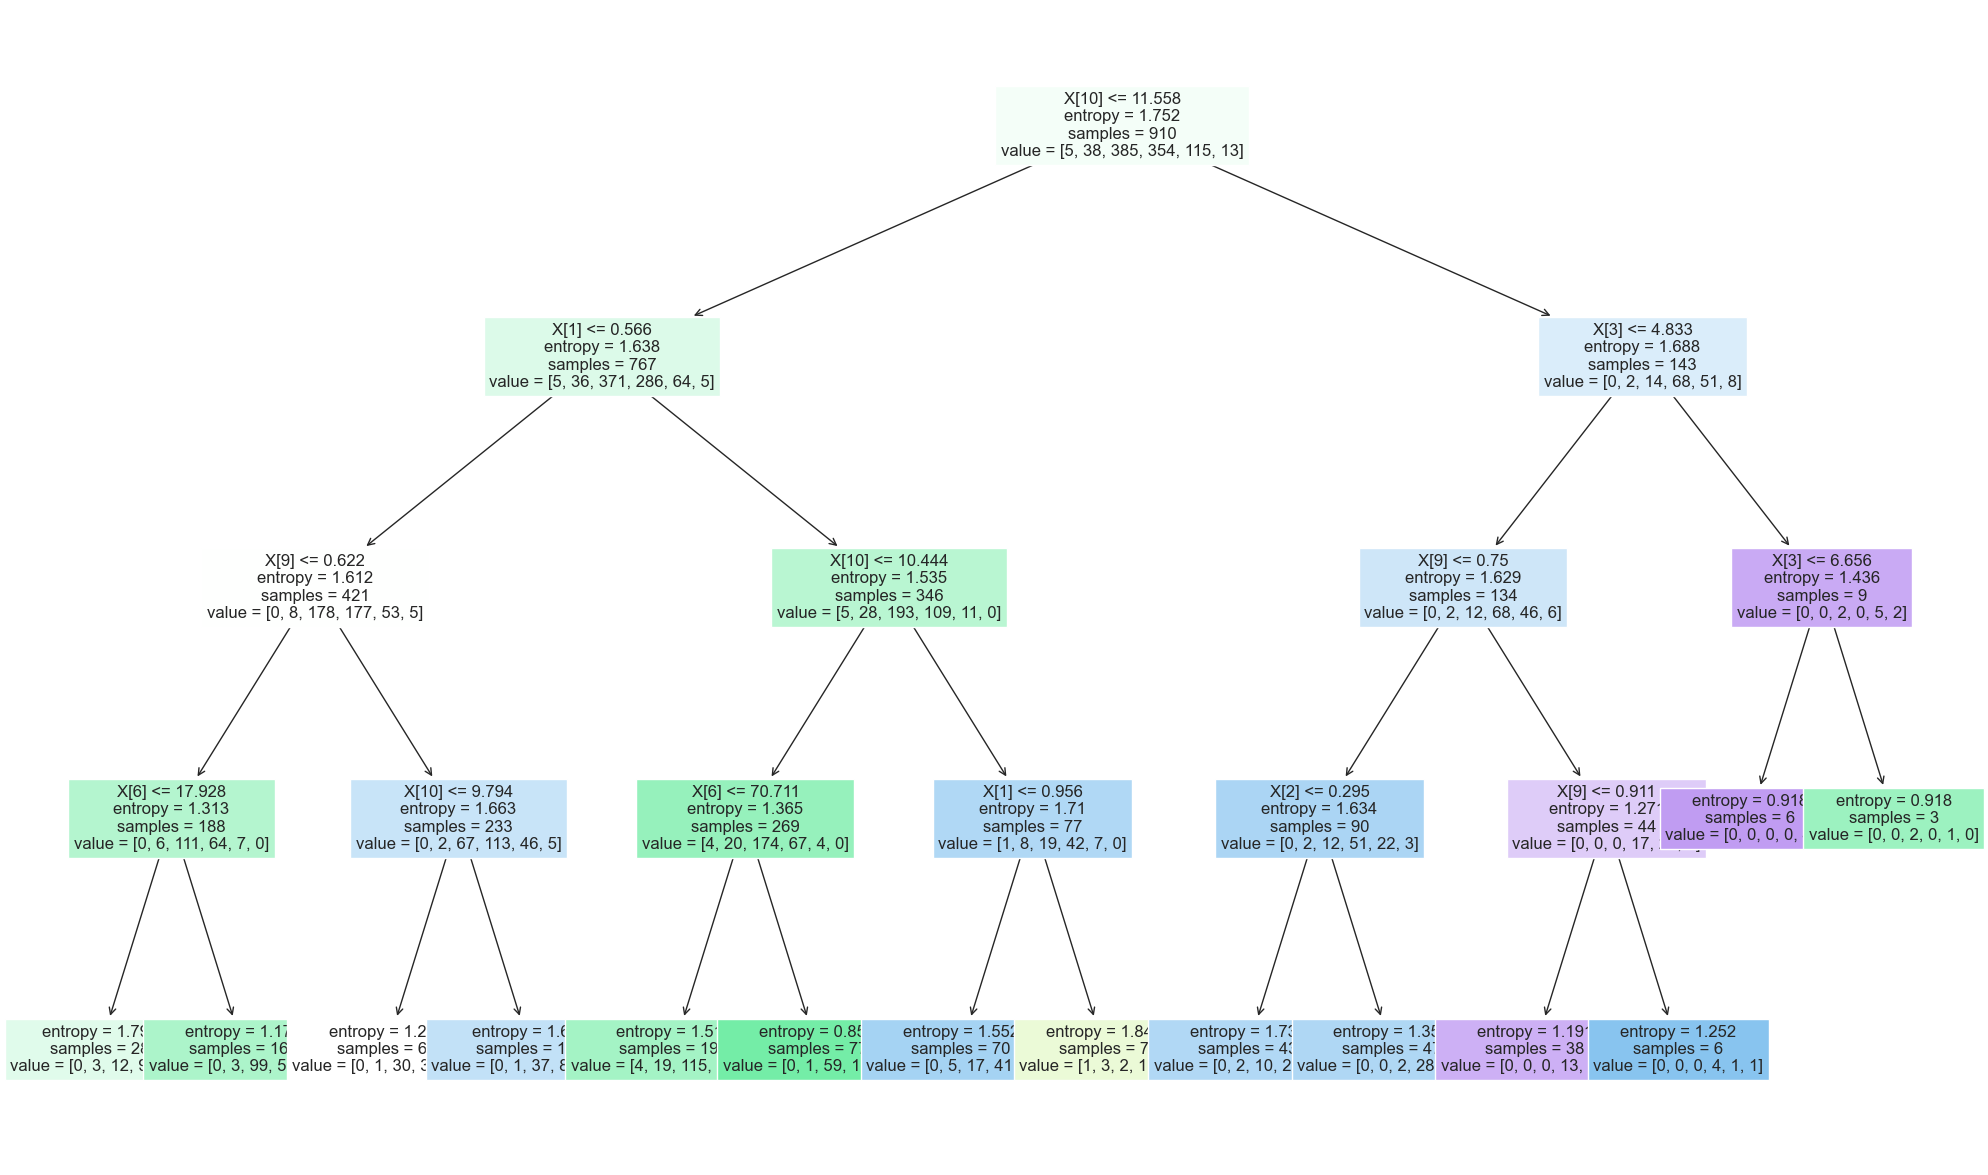

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,15))
tree.plot_tree(model_with_best_params, filled=True, fontsize=12)

In [ ]:
fig.savefig("Decision_Tree_Classifier.png")

# Random Forest CLassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
Rf_model = RandomForestClassifier()

In [ ]:
Rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred_rf = Rf_model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred_rf)

0.6146993318485523

### Accuracy is more as compared to Decision Tree

In [ ]:
grid_param_rf = {
    'n_estimators' : [90,100],
    'criterion': ['gini', 'entropy'],
    'max_depth': range(2,20,1),
    'min_samples_leaf': range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features': ['auto', 'log2']
}

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_search_rf = GridSearchCV(estimator=Rf_model, param_grid=grid_param_rf, cv=3, verbose=2, n_jobs=-1)   # n_jobs shows the power it will use of system

In [ ]:
grid_search_rf.fit(X_train, y_train)

Fitting 3 folds for each of 10368 candidates, totalling 31104 fits


C:\Users\Himz\anaconda3\envs\EDA\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 20),
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'n_estimators': [90, 100]},
             verbose=2)

In [ ]:
grid_search_rf.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'auto',
 'min_samples_leaf': 9,
 'min_samples_split': 9,
 'n_estimators': 90}

In [ ]:
model_rf_better = RandomForestClassifier(criterion='gini', max_depth=13,
                                         max_features='auto', min_samples_leaf=7,
                                         min_samples_split=6, n_estimators=90)

In [ ]:
model_rf_better.fit(X_train, y_train)

C:\Users\Himz\anaconda3\envs\EDA\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=13, max_features='auto', min_samples_leaf=7,
                       min_samples_split=6, n_estimators=90)

In [ ]:
y_pred_rf_better = model_rf_better.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred_rf_better)

0.621380846325167

## Better Accuracy after Hyperparameter Tuning

> ## For ensembling we can use BaggingClassifier to ensemble various models

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

modelbagging_svc = BaggingClassifier(
    base_estimator=SVC(),
    n_estimators=50,
    random_state=0
)

In [ ]:
modelbagging_svc.fit(X_train, y_train)
y_pred_bag = modelbagging_svc.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred_bag)

0.5100222717149221

### We got 51% Accuracy with SVC Ensembling

# In order to use multiple models for ensembling use VotingClassifier

------------------------

# ADABOOST

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()

In [ ]:
model.fit(X_train, y_train)

AdaBoostClassifier()

In [ ]:
model.fit(X_train, y_train)

AdaBoostClassifier()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.5367483296213809

In [ ]:
grid_param = {
    'n_estimators' : [90,100,130,150],
    'learning_rate':[0.001, 0.01, 0.1, 0.5]
}

In [ ]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(param_grid=grid_param, estimator=model,
                    cv=3,
                    verbose=2,
                    n_jobs=-1)

In [ ]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.5],
                         'n_estimators': [90, 100, 130, 150]},
             verbose=2)

In [ ]:
grid.best_params_

{'learning_rate': 0.01, 'n_estimators': 90}

In [ ]:
model_better = AdaBoostClassifier(learning_rate=0.01,
                                  n_estimators=90)

In [ ]:
model_better.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.01, n_estimators=90)

In [ ]:
y_ada_pred = model_better.predict(X_test)

In [ ]:
accuracy_score(y_test, y_ada_pred)

0.5567928730512249

# Gradient Boosting

In [16]:
from sklearn.ensemble import GradientBoostingClassifier

model_gbm = GradientBoostingClassifier()

In [17]:
model_gbm.fit(X_train, y_train)

GradientBoostingClassifier()

In [18]:
y_pred_gbm = model_gbm.predict(X_test)

In [19]:
accuracy_score(y_test, y_pred_gbm)

0.5968819599109132

# XGBoost Classifier

In [20]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier()

model_xgb.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob')

In [21]:
y_pred_xgb = model_xgb.predict(X_test)

In [22]:
accuracy_score(y_test, y_pred_xgb)

0.6347438752783965

> ## Hyperparameter Tuning

**GridSearch CV**

In [ ]:
grid_param = {
    'learning_rate': [0.01, 0.001,0.1, 0.0001],
    'n_estimators': [50,100,150, 200],
    'max_depth': range(2,20,1),
    'min_samples_leaf': range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features': ['auto', 'log2']
}

In [ ]:
grid = GridSearchCV(estimator=model_gbm, param_grid=grid_param, cv=3, verbose=2, n_jobs=-1)

In [ ]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 41472 candidates, totalling 124416 fits


KeyboardInterrupt: 

**Optuna**

In [33]:

def objective_classification(trial, data=X, target=y):
    train_X, test_x, train_y, test_y = train_test_split(data, target, test_size=0.20, random_state=42)

    param = {
        'tree_method' :'gpu_hist',
        'verbosity' : 3,
        'objective' : 'binary:logistics',
        'booster': trial.suggest_categorical('booster', ['dart', 'gbtree', 'gblinear']),
        'lambda' : trial.suggest_float('lambda', 1e-4, 1),
        'alpha' : trial.suggest_float('alpha', 1e-4, 1),
        'subsample' : trial.suggest_float('subsample', .1, .5),
        'colsample_bytree' : trial.suggest_float('colsample_bytree', .1,.5)
    }

    if param['booster'] in ['gbtree', 'dart']:
        param['gamma'] : trial.suggest_float('gamma', 1e-3, 4)
        param['eta'] : trial.suggest_float('eta', 0.001, 5)

    xgb_classification = XGBClassifier(**param)
    xgb_classification.fit(train_X, train_y, eval_set= [(test_x, test_y)])
    pred = xgb_classification.predict(test_x)
    accuracy = xgb_classification.score(test_x, test_y)

    return accuracy

In [36]:
import optuna

xgb_classification_optuna = optuna.create_study(direction='maximize')


[I 2022-11-22 06:01:48,145] A new study created in memory with name: no-name-2c6659e5-11ad-4c4e-8c59-8db23bc1a37d


In [37]:
xgb_classification_optuna.optimize(objective_classification, n_trials = 10)

[0]	validation_0-merror:0.558824
[1]	validation_0-merror:0.558824
[2]	validation_0-merror:0.555147
[3]	validation_0-merror:0.551471
[4]	validation_0-merror:0.544118
[5]	validation_0-merror:0.536765
[6]	validation_0-merror:0.511029
[7]	validation_0-merror:0.507353
[8]	validation_0-merror:0.492647
[9]	validation_0-merror:0.5
[10]	validation_0-merror:0.492647
[11]	validation_0-merror:0.496324
[12]	validation_0-merror:0.496324
[13]	validation_0-merror:0.5
[14]	validation_0-merror:0.503676
[15]	validation_0-merror:0.5
[16]	validation_0-merror:0.496324
[17]	validation_0-merror:0.488971
[18]	validation_0-merror:0.485294
[19]	validation_0-merror:0.481618
[20]	validation_0-merror:0.488971
[21]	validation_0-merror:0.492647
[22]	validation_0-merror:0.496324
[23]	validation_0-merror:0.496324
[24]	validation_0-merror:0.492647
[25]	validation_0-merror:0.496324
[26]	validation_0-merror:0.492647
[27]	validation_0-merror:0.492647
[28]	validation_0-merror:0.492647
[29]	validation_0-merror:0.488971
[30]	

[I 2022-11-22 06:01:50,762] Trial 0 finished with value: 0.5110294117647058 and parameters: {'booster': 'gblinear', 'lambda': 0.18098741286589848, 'alpha': 0.5515082657988692, 'subsample': 0.3328741557582109, 'colsample_bytree': 0.36675322003192934}. Best is trial 0 with value: 0.5110294117647058.


[06:01:50] EvalOneIter: 0.014045s, 100 calls @ 140us
[06:01:50] GetGradient: 0.0128566s, 100 calls @ 128us
[06:01:50] PredictRaw: 0.00231974s, 100 calls @ 23us
[06:01:50] UpdateOneIter: 0.234814s, 100 calls @ 2348us
[06:01:50] ======== Monitor: GBLinear ========
[06:01:50] DoBoost: 0.217388s, 100 calls @ 2173us
[06:01:50] PredictBatch: 0.00621381s, 202 calls @ 30us
[06:01:50] PredictBatchInternal: 0.153028s, 203 calls @ 753us
[0]	validation_0-merror:0.584559
[1]	validation_0-merror:0.507353
[2]	validation_0-merror:0.477941
[3]	validation_0-merror:0.477941
[4]	validation_0-merror:0.5
[5]	validation_0-merror:0.470588
[6]	validation_0-merror:0.470588
[7]	validation_0-merror:0.455882
[8]	validation_0-merror:0.481618
[9]	validation_0-merror:0.477941
[10]	validation_0-merror:0.481618
[11]	validation_0-merror:0.477941
[12]	validation_0-merror:0.459559
[13]	validation_0-merror:0.470588
[14]	validation_0-merror:0.452206
[15]	validation_0-merror:0.466912
[16]	validation_0-merror:0.470588
[17]	va

[I 2022-11-22 06:01:52,952] Trial 1 finished with value: 0.5772058823529411 and parameters: {'booster': 'gbtree', 'lambda': 0.8221920128943397, 'alpha': 0.3944385097201932, 'subsample': 0.48457789520215344, 'colsample_bytree': 0.10169604465711268}. Best is trial 1 with value: 0.5772058823529411.


[06:01:52] Quantiles: 0.00220163s, 1 calls @ 2201us
[06:01:52] Update: 1.93227s, 600 calls @ 3220us
[06:01:52] ======== NCCL Statistics========
[06:01:52] AllReduce calls: 2705
[06:01:52] AllReduce total MB communicated: 40
[06:01:52] ======== Monitor: HistCutMatrix ========
[06:01:52] ======== Monitor: DeviceShard0 ========
[06:01:52] AllReduce: 0.0077834s, 2105 calls @ 3us
[06:01:52] BuildHist: 0.0380165s, 1505 calls @ 25us
[06:01:52] EvaluateSplits: 0.0728091s, 1505 calls @ 48us
[06:01:52] FinalisePosition: 0.00556777s, 600 calls @ 9us
[06:01:52] InitRoot: 1.70284s, 600 calls @ 2838us
[06:01:52] Reset: 0.0625476s, 600 calls @ 104us
[06:01:52] UpdatePosition: 0.0340463s, 1505 calls @ 22us
[06:01:52] ======== Monitor: HistCutMatrix ========
[0]	validation_0-merror:0.558824
[1]	validation_0-merror:0.558824
[2]	validation_0-merror:0.555147
[3]	validation_0-merror:0.551471
[4]	validation_0-merror:0.544118
[5]	validation_0-merror:0.536765
[6]	validation_0-merror:0.511029
[7]	validation_0-

[I 2022-11-22 06:01:53,396] Trial 2 finished with value: 0.5110294117647058 and parameters: {'booster': 'gblinear', 'lambda': 0.5902116888822966, 'alpha': 0.8395880132393589, 'subsample': 0.108881734654726, 'colsample_bytree': 0.4260418960773614}. Best is trial 1 with value: 0.5772058823529411.


[06:01:53] EvalOneIter: 0.00916976s, 100 calls @ 91us
[06:01:53] GetGradient: 0.0338153s, 100 calls @ 338us
[06:01:53] PredictRaw: 0.00147114s, 100 calls @ 14us
[06:01:53] UpdateOneIter: 0.235737s, 100 calls @ 2357us
[06:01:53] ======== Monitor: GBLinear ========
[06:01:53] DoBoost: 0.200102s, 100 calls @ 2001us
[06:01:53] PredictBatch: 0.00468627s, 202 calls @ 23us
[06:01:53] PredictBatchInternal: 0.140041s, 203 calls @ 689us
[0]	validation_0-merror:0.485294
[1]	validation_0-merror:0.485294
[2]	validation_0-merror:0.470588
[3]	validation_0-merror:0.433824
[4]	validation_0-merror:0.430147
[5]	validation_0-merror:0.426471
[6]	validation_0-merror:0.430147
[7]	validation_0-merror:0.419118
[8]	validation_0-merror:0.408088
[9]	validation_0-merror:0.411765
[10]	validation_0-merror:0.400735
[11]	validation_0-merror:0.400735
[12]	validation_0-merror:0.404412
[13]	validation_0-merror:0.408088
[14]	validation_0-merror:0.397059
[15]	validation_0-merror:0.393382
[16]	validation_0-merror:0.389706
[

[I 2022-11-22 06:01:55,505] Trial 3 finished with value: 0.6544117647058824 and parameters: {'booster': 'gbtree', 'lambda': 0.4478803101788083, 'alpha': 0.2978299774523648, 'subsample': 0.2010710960091524, 'colsample_bytree': 0.41923489136034187}. Best is trial 3 with value: 0.6544117647058824.


[06:01:55] DevicePredictInternal: 0.00794334s, 202 calls @ 39us
[06:01:55] PredictFromCache: 0.00346275s, 199 calls @ 17us
[06:01:55] ======== Monitor: updater_gpu_hist ========
[06:01:55] BinningCompression: 0.000397994s, 1 calls @ 397us
[06:01:55] InitData: 0.0103001s, 600 calls @ 17us
[06:01:55] InitDataOnce: 0.0101649s, 1 calls @ 10164us
[06:01:55] Quantiles: 0.00168687s, 1 calls @ 1686us
[06:01:55] Update: 1.90847s, 600 calls @ 3180us
[06:01:55] ======== NCCL Statistics========
[06:01:55] AllReduce calls: 2627
[06:01:55] AllReduce total MB communicated: 38
[06:01:55] ======== Monitor: HistCutMatrix ========
[06:01:55] ======== Monitor: DeviceShard0 ========
[06:01:55] AllReduce: 0.0074916s, 2027 calls @ 3us
[06:01:55] BuildHist: 0.0407801s, 1427 calls @ 28us
[06:01:55] EvaluateSplits: 0.0626734s, 1427 calls @ 43us
[06:01:55] FinalisePosition: 0.00552633s, 600 calls @ 9us
[06:01:55] InitRoot: 1.69009s, 600 calls @ 2816us
[06:01:55] Reset: 0.0626826s, 600 calls @ 104us
[06:01:55] Up

[I 2022-11-22 06:01:55,949] Trial 4 finished with value: 0.5110294117647058 and parameters: {'booster': 'gblinear', 'lambda': 0.9716423399378046, 'alpha': 0.2858168457730356, 'subsample': 0.47592717260901374, 'colsample_bytree': 0.4518406803109598}. Best is trial 3 with value: 0.6544117647058824.


[06:01:55] EvalOneIter: 0.0106071s, 100 calls @ 106us
[06:01:55] GetGradient: 0.00931021s, 100 calls @ 93us
[06:01:55] PredictRaw: 0.00703507s, 100 calls @ 70us
[06:01:55] UpdateOneIter: 0.244655s, 100 calls @ 2446us
[06:01:55] ======== Monitor: GBLinear ========
[06:01:55] DoBoost: 0.223481s, 100 calls @ 2234us
[06:01:55] PredictBatch: 0.00711182s, 202 calls @ 35us
[06:01:55] PredictBatchInternal: 0.161872s, 203 calls @ 797us
[06:01:56] INFO: /workspace/src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[0]	validation_0-merror:0.430147
[06:01:56] INFO: /workspace/src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[1]	validation_0-merror:0.393382
[06:01:56] INFO: /workspace/src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[2]	validation_0-merror:0.386029
[06:01:56] INFO: /workspace/src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[3]	validation_0-merror:0.400735
[06:01:56] INFO: /workspace/src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[4]	validation_0-merror:0.400735
[06:01:56] INFO: /worksp

[I 2022-11-22 06:01:59,572] Trial 5 finished with value: 0.6286764705882353 and parameters: {'booster': 'dart', 'lambda': 0.20344661773852638, 'alpha': 0.5907741002118502, 'subsample': 0.28147601514313325, 'colsample_bytree': 0.4761568944368687}. Best is trial 3 with value: 0.6544117647058824.


[06:01:59] ======== Monitor: Learner ========
[06:01:59] EvalOneIter: 0.297143s, 100 calls @ 2971us
[06:01:59] GetGradient: 0.00697381s, 100 calls @ 69us
[06:01:59] PredictRaw: 1.15106s, 100 calls @ 11510us
[06:01:59] UpdateOneIter: 3.10281s, 100 calls @ 31028us
[06:01:59] ======== Monitor: GBTree ========
[06:01:59] BoostNewTrees: 1.92977s, 100 calls @ 19297us
[06:01:59] CommitModel: 0.0145921s, 100 calls @ 145us
[06:01:59] ======== Monitor:  ========
[06:01:59] ======== Monitor: updater_gpu_hist ========
[06:01:59] BinningCompression: 0.000391925s, 1 calls @ 391us
[06:01:59] InitData: 0.0103414s, 600 calls @ 17us
[06:01:59] InitDataOnce: 0.0102281s, 1 calls @ 10228us
[06:01:59] Quantiles: 0.00172393s, 1 calls @ 1723us
[06:01:59] Update: 1.90617s, 600 calls @ 3176us
[06:01:59] ======== NCCL Statistics========
[06:01:59] AllReduce calls: 2747
[06:01:59] AllReduce total MB communicated: 40
[06:01:59] ======== Monitor: HistCutMatrix ========
[06:01:59] ======== Monitor: DeviceShard0 ====

[I 2022-11-22 06:02:00,000] Trial 6 finished with value: 0.5110294117647058 and parameters: {'booster': 'gblinear', 'lambda': 0.5436839462780053, 'alpha': 0.0979524167504841, 'subsample': 0.17875381558330916, 'colsample_bytree': 0.4187422152040121}. Best is trial 3 with value: 0.6544117647058824.



[06:01:59] ======== Monitor: GBLinear ========
[06:01:59] DoBoost: 0.184452s, 100 calls @ 1844us
[06:01:59] PredictBatch: 0.00539962s, 202 calls @ 26us
[06:01:59] PredictBatchInternal: 0.126213s, 203 calls @ 621us
[06:02:00] INFO: /workspace/src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[0]	validation_0-merror:0.606618
[06:02:00] INFO: /workspace/src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[1]	validation_0-merror:0.558824
[06:02:00] INFO: /workspace/src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[2]	validation_0-merror:0.536765
[06:02:00] INFO: /workspace/src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[3]	validation_0-merror:0.529412
[06:02:00] INFO: /workspace/src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[4]	validation_0-merror:0.533088
[06:02:00] INFO: /workspace/src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[5]	validation_0-merror:0.525735
[06:02:00] INFO: /workspace/src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[6]	validation_0-merror:0.470588
[06:02:00] INFO: /work

[I 2022-11-22 06:02:03,482] Trial 7 finished with value: 0.5919117647058824 and parameters: {'booster': 'dart', 'lambda': 0.5640261682535397, 'alpha': 0.09879868967819129, 'subsample': 0.12229700871506483, 'colsample_bytree': 0.17439070765505277}. Best is trial 3 with value: 0.6544117647058824.


[06:02:03] ======== Monitor: Learner ========
[06:02:03] EvalOneIter: 0.263502s, 100 calls @ 2635us
[06:02:03] GetGradient: 0.00686968s, 100 calls @ 68us
[06:02:03] PredictRaw: 1.0309s, 100 calls @ 10308us
[06:02:03] UpdateOneIter: 2.95306s, 100 calls @ 29530us
[06:02:03] ======== Monitor: GBTree ========
[06:02:03] BoostNewTrees: 1.90029s, 100 calls @ 19002us
[06:02:03] CommitModel: 0.0145693s, 100 calls @ 145us
[06:02:03] ======== Monitor:  ========
[06:02:03] ======== Monitor: updater_gpu_hist ========
[06:02:03] BinningCompression: 0.000350426s, 1 calls @ 350us
[06:02:03] InitData: 0.0155724s, 600 calls @ 25us
[06:02:03] InitDataOnce: 0.0154172s, 1 calls @ 15417us
[06:02:03] Quantiles: 0.00167355s, 1 calls @ 1673us
[06:02:03] Update: 1.87575s, 600 calls @ 3126us
[06:02:03] ======== NCCL Statistics========
[06:02:03] AllReduce calls: 2405
[06:02:03] AllReduce total MB communicated: 34
[06:02:03] ======== Monitor: HistCutMatrix ========
[06:02:03] ======== Monitor: DeviceShard0 =====

[I 2022-11-22 06:02:03,904] Trial 8 finished with value: 0.5110294117647058 and parameters: {'booster': 'gblinear', 'lambda': 0.9039978585610617, 'alpha': 0.48301176776484467, 'subsample': 0.35327675090407984, 'colsample_bytree': 0.1584585549064244}. Best is trial 3 with value: 0.6544117647058824.


[06:02:03] INFO: /workspace/src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[0]	validation_0-merror:0.496324
[06:02:03] INFO: /workspace/src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[1]	validation_0-merror:0.466912
[06:02:04] INFO: /workspace/src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[2]	validation_0-merror:0.455882
[06:02:04] INFO: /workspace/src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[3]	validation_0-merror:0.422794
[06:02:04] INFO: /workspace/src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[4]	validation_0-merror:0.419118
[06:02:04] INFO: /workspace/src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[5]	validation_0-merror:0.389706
[06:02:04] INFO: /workspace/src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[6]	validation_0-merror:0.415441
[06:02:04] INFO: /workspace/src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[7]	validation_0-merror:0.411765
[06:02:04] INFO: /workspace/src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[8]	validation_0-merror:0.408088
[06:02:04] INFO: /w

[I 2022-11-22 06:02:07,507] Trial 9 finished with value: 0.5992647058823529 and parameters: {'booster': 'dart', 'lambda': 0.9319178581147933, 'alpha': 0.5135702501050864, 'subsample': 0.30525250394597925, 'colsample_bytree': 0.41282343932124976}. Best is trial 3 with value: 0.6544117647058824.


[06:02:07] ======== Monitor: Learner ========
[06:02:07] EvalOneIter: 0.292093s, 100 calls @ 2920us
[06:02:07] GetGradient: 0.00674507s, 100 calls @ 67us
[06:02:07] PredictRaw: 1.1588s, 100 calls @ 11587us
[06:02:07] UpdateOneIter: 3.11505s, 100 calls @ 31150us
[06:02:07] ======== Monitor: GBTree ========
[06:02:07] BoostNewTrees: 1.93654s, 100 calls @ 19365us
[06:02:07] CommitModel: 0.0125825s, 100 calls @ 125us
[06:02:07] ======== Monitor:  ========
[06:02:07] ======== Monitor: updater_gpu_hist ========
[06:02:07] BinningCompression: 0.000374655s, 1 calls @ 374us
[06:02:07] InitData: 0.0156253s, 600 calls @ 26us
[06:02:07] InitDataOnce: 0.0155104s, 1 calls @ 15510us
[06:02:07] Quantiles: 0.00175203s, 1 calls @ 1752us
[06:02:07] Update: 1.91323s, 600 calls @ 3188us
[06:02:07] ======== NCCL Statistics========
[06:02:07] AllReduce calls: 2755
[06:02:07] AllReduce total MB communicated: 41
[06:02:07] ======== Monitor: HistCutMatrix ========
[06:02:07] ======== Monitor: DeviceShard0 =====

In [38]:
xgb_classification_optuna.best_trial

FrozenTrial(number=3, values=[0.6544117647058824], datetime_start=datetime.datetime(2022, 11, 22, 6, 1, 53, 399844), datetime_complete=datetime.datetime(2022, 11, 22, 6, 1, 55, 504841), params={'booster': 'gbtree', 'lambda': 0.4478803101788083, 'alpha': 0.2978299774523648, 'subsample': 0.2010710960091524, 'colsample_bytree': 0.41923489136034187}, distributions={'booster': CategoricalDistribution(choices=('dart', 'gbtree', 'gblinear')), 'lambda': FloatDistribution(high=1.0, log=False, low=0.0001, step=None), 'alpha': FloatDistribution(high=1.0, log=False, low=0.0001, step=None), 'subsample': FloatDistribution(high=0.5, log=False, low=0.1, step=None), 'colsample_bytree': FloatDistribution(high=0.5, log=False, low=0.1, step=None)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=3, state=TrialState.COMPLETE, value=None)

In [39]:
param = xgb_classification_optuna.best_trial.params

In [40]:
xgb_final_clas = XGBClassifier(**param)
xgb_final_clas.fit(X_train, y_train)

XGBClassifier(alpha=0.2978299774523648, colsample_bytree=0.41923489136034187,
              lambda=0.4478803101788083, objective='multi:softprob',
              subsample=0.2010710960091524)

In [41]:
y_pred_optuna = xgb_final_clas.predict(X_test)

In [42]:
accuracy_score(y_test, y_pred_optuna)

0.6191536748329621